In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

from walmart_sales.constants import PROCESSED_DATA_DIR, PROCESSED_DATA_FILE, HORIZON, FEATURES_WINDOW
from walmart_sales.data import WalmartDataset
from walmart_sales.evaluation import validate, mape, smape, wape
from walmart_sales.model import LastWeekModel
from walmart_sales.utils import add_weeks
from walmart_sales.visualization import plot_forecast_vs_target

In [2]:
df = pd.read_csv(Path("..", PROCESSED_DATA_DIR, PROCESSED_DATA_FILE), parse_dates=["Date"])

In [3]:
dataset = WalmartDataset(df)
model = LastWeekModel()

# Validation

In [4]:
val_smape, _ = validate(dataset.val_ts_split, model, smape)
print(f"Validation SMAPE: {val_smape}")

Validation SMAPE: 16.610296676383946


In [5]:
val_mape, _ = validate(dataset.val_ts_split, model, mape)
print(f"Validation MAPE: {val_mape}")

Validation MAPE: 357441.0325068097


In [6]:
val_wape, _ = validate(dataset.val_ts_split, model, wape)
print(f"Validation WAPE: {val_wape}")

Validation WAPE: 11.41969844810854


## Test

In [7]:
test_smape, df_test_with_preds = validate(dataset.test_ts_split, model, smape)

In [8]:
test_smape

17.256915194360488

In [9]:
smape_by_horizon = df_test_with_preds.groupby("horizon").apply(
    lambda x: pd.Series(
        [smape(x.target, x.pred), len(x.target), len(x[["Store", "Dept"]].drop_duplicates())], 
        index=["smape", "data points", "departments"]
    )
).sort_index()
smape_by_horizon

,smape,data points,departments
horizon,,,
1,14.320053,32113.0,2681.0
2,17.024782,29438.0,2681.0
3,18.867130,26762.0,2680.0
4,19.667130,24086.0,2679.0


<Axes: xlabel='horizon', ylabel='SMAPE'>

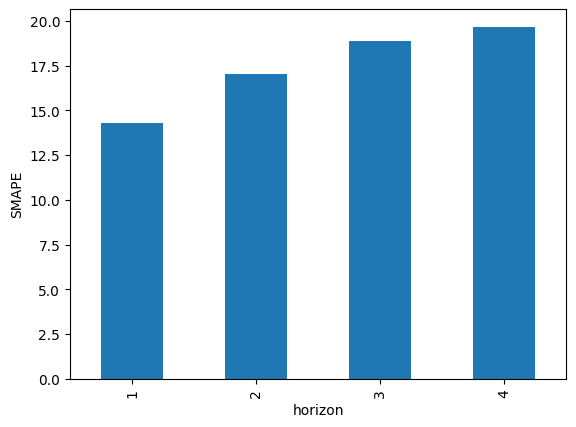

In [10]:
plt.ylabel("SMAPE")
smape_by_horizon["smape"].plot.bar()

In [11]:
smape_by_department = df_test_with_preds.groupby("Dept").apply(
    lambda x: pd.Series(
        [smape(x.target, x.pred), len(x.target), len(x[["Store", "Dept"]].drop_duplicates())], 
        index=["smape", "data points", "departments"]
    )
).sort_values("smape")
smape_by_department

,smape,data points,departments
Dept,,,
8,4.959915,1890.0,45.0
40,5.173197,1890.0,45.0
94,5.948649,1176.0,28.0
90,6.183521,1890.0,45.0
81,6.311506,1890.0,45.0
...,...,...,...
48,54.614809,42.0,1.0
36,55.594735,1512.0,36.0
54,72.216438,42.0,1.0


<Axes: xlabel='Dept', ylabel='SMAPE'>

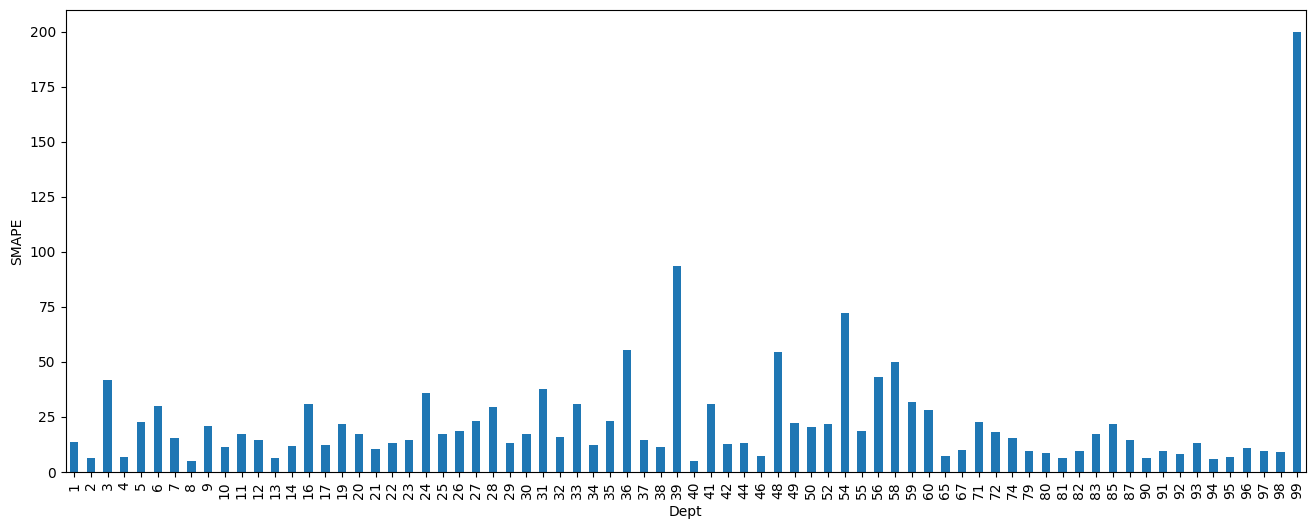

In [12]:
plt.figure(figsize=(16,6))
plt.ylabel("SMAPE")
smape_by_department["smape"].sort_index().plot.bar()

In [13]:
smape_by_forecast_week = df_test_with_preds.groupby("forecast_week").apply(
    lambda x: pd.Series(
        [smape(x.target, x.pred), len(x.target), len(x[["Store", "Dept"]].drop_duplicates())], 
        index=["smape", "data points", "departments"]
    )
).sort_index()
smape_by_forecast_week

,smape,data points,departments
forecast_week,,,
2012-08-03,16.732337,10703.0,2678.0
2012-08-10,16.702102,10704.0,2678.0
2012-08-17,17.902848,10706.0,2679.0
2012-08-24,19.429322,10706.0,2678.0
2012-08-31,19.966750,10706.0,2678.0
2012-09-07,19.725856,10707.0,2679.0
2012-09-14,16.142260,10705.0,2677.0
2012-09-21,15.370105,10705.0,2677.0
2012-09-28,16.726328,10704.0,2677.0


<Axes: xlabel='forecast_week'>

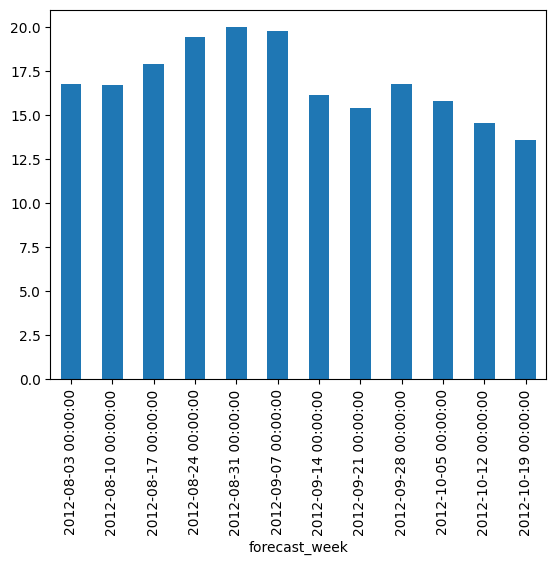

In [14]:
smape_by_forecast_week["smape"].plot.bar()

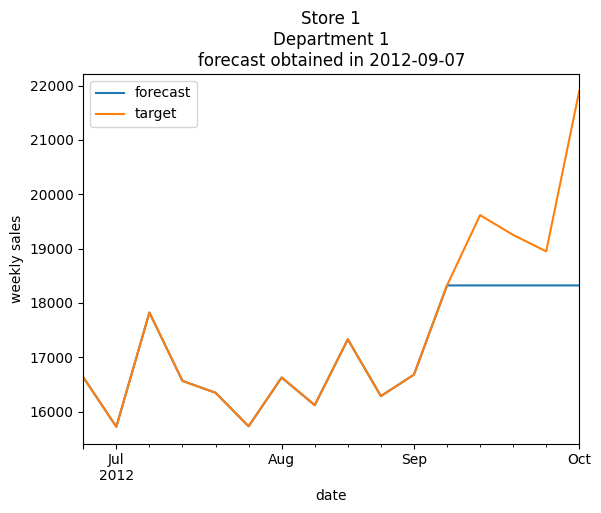

In [15]:
plot_forecast_vs_target(df_test_with_preds, 1, 1, "2012-09-07")

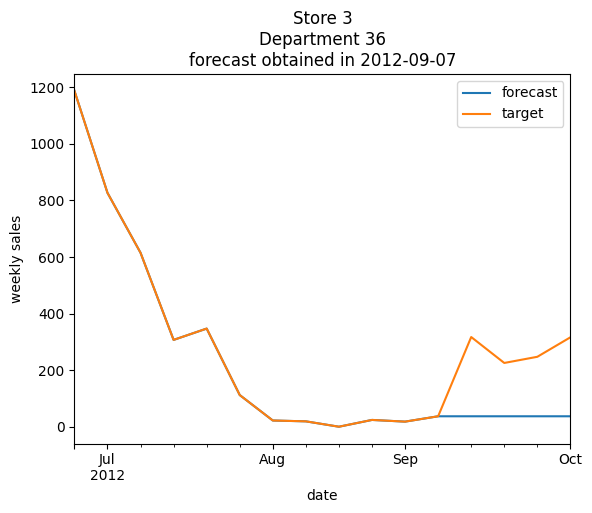

In [16]:
plot_forecast_vs_target(df_test_with_preds, 3, 36, "2012-09-07")

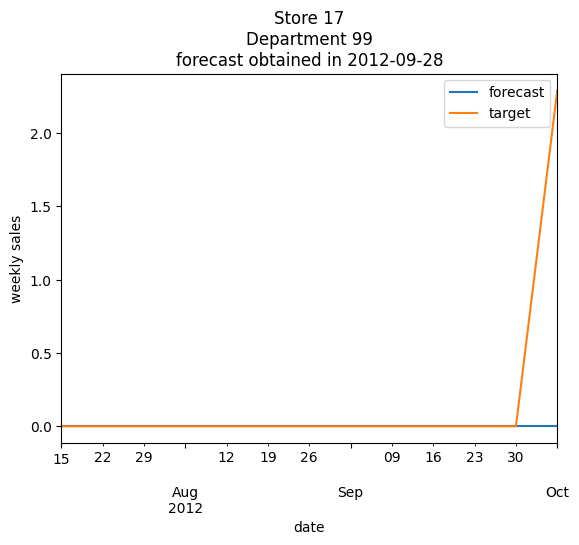

In [17]:
plot_forecast_vs_target(df_test_with_preds, 17, 99, "2012-09-28")